#  Исследование магазина компьютерных

Перед нами открытые данные по вышедшим игра до 2016 года. Требуется провести исследование данных для составления рекламной компнии.

## Цели, вопросы, гипотезы
    Цель исследования: провести исследование данных на закономерности успешности игр от разных факторов для построение рекламной кампании.
    Основные вопросы:
        - сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
        - как менялись продажи по платформам?
        - какие платформы лидируют по продажам?
        - как влияют отзывы критиков и геймеров на продажи?
        - какое распределение игр по жанрам?
    Гипотезы:
        - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
        - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

##    Задачи:
    1) подготовить данные для анализа
    2) провести исследования и ответить на вопросы
        сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
        как менялись продажи по платформам?
        какие платформы лидируют по продажам?
        как влияют отзывы критиков и геймеров на продажи?
        какое распределение игр по жанрам?
    3) составить портрет пользователя для каждого региона
    4) проверить гипотезы:
        средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
        средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    5) общий вывод

## Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy import stats as st

# Ознакомимся с данными

In [ ]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [ ]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
# Приведем заголовки к нижнему регистру
data.columns = map(str.lower, data.columns)

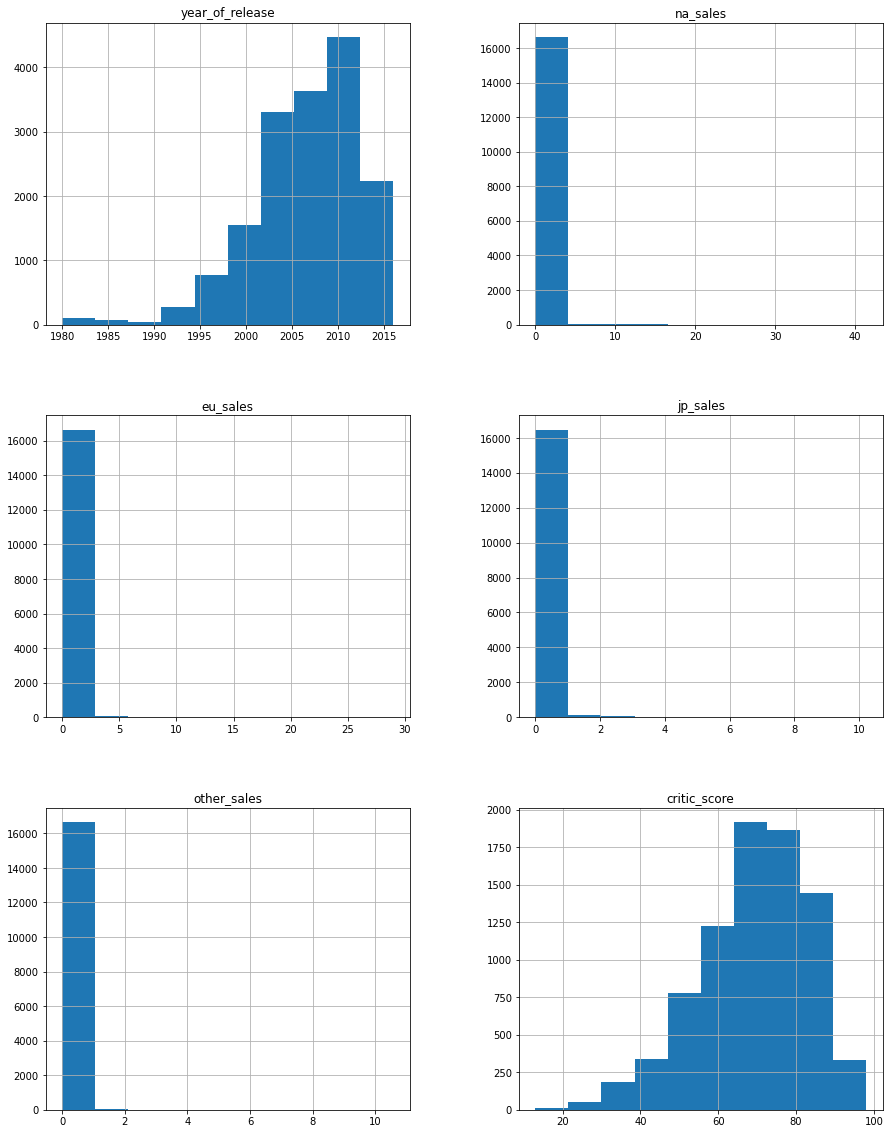

In [ ]:
data.hist(figsize=(15, 20));

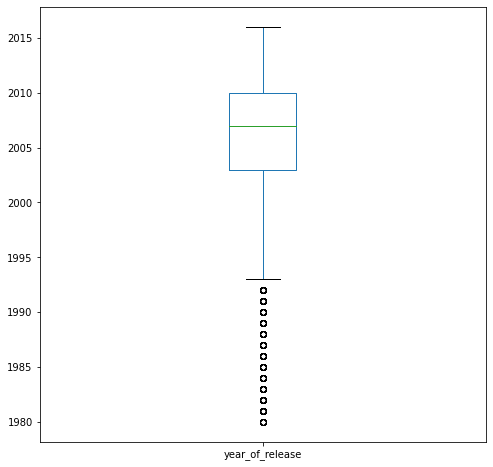

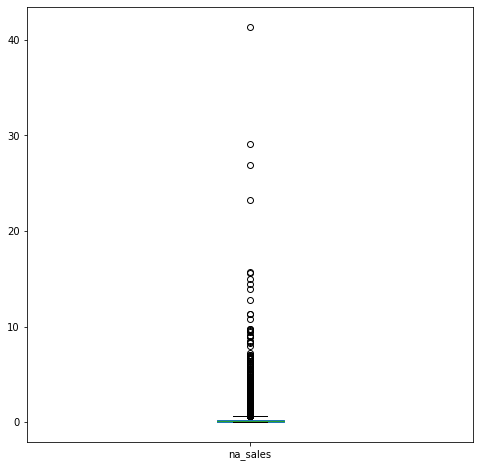

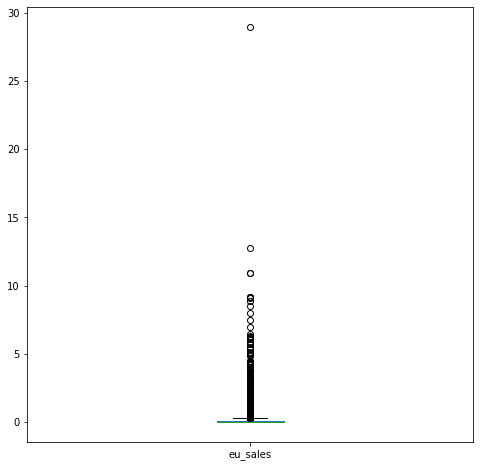

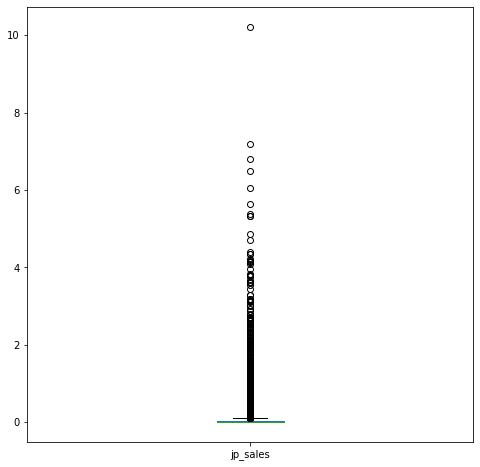

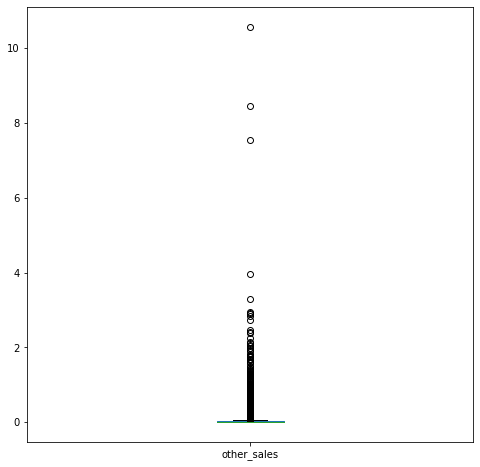

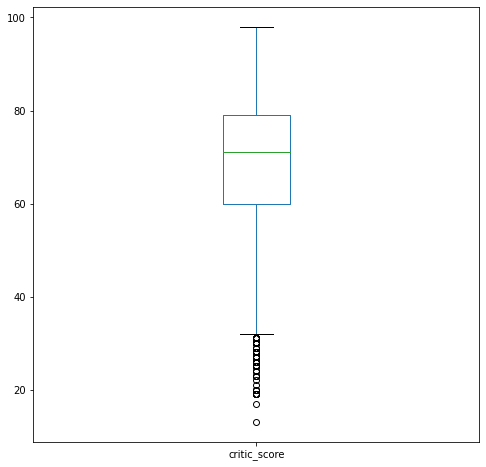

In [ ]:
columns_2 = ['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']
for i in columns_2:
    data[i].plot(kind='box', figsize=(8, 8))
    plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Количество пропускив в %' + "\n", fontsize = 22, color = 'SteelBlue')
        );
    except:
        print('пропусков не осталось :) ')

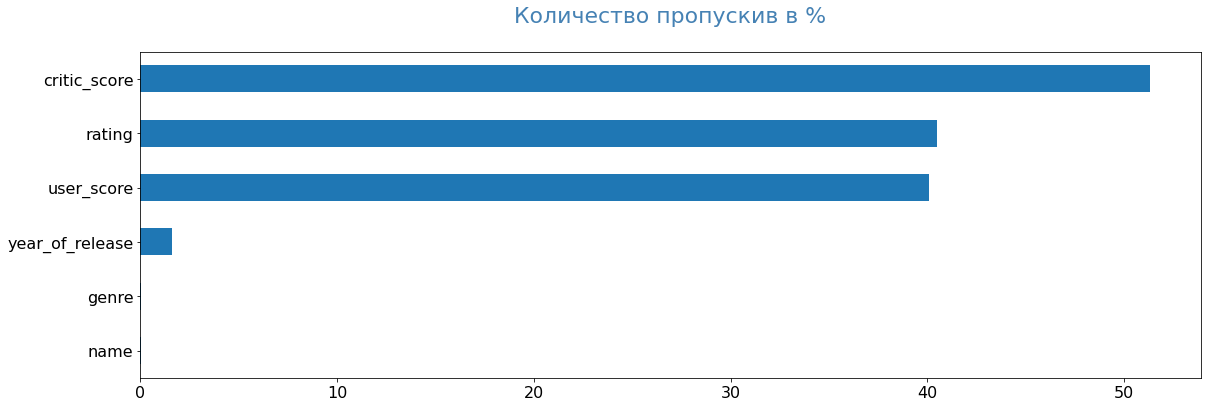

In [ ]:
pass_value_barh(data)

In [ ]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
# Проверим уникальные значения по стобцам.

columns_inique = ['rating', 'platform', 'genre', 'user_score', 'critic_score',]
for i in columns_inique:
    print('Уникальные значения в столбце', [i])
    print(data[i].unique())

Уникальные значения в столбце ['rating']
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
Уникальные значения в столбце ['platform']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Уникальные значения в столбце ['genre']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Уникальные значения в столбце ['user_score']
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6

In [ ]:
rating = ['E','M', 'T', 'E10+', 'K-A', 'AO','EC', 'RP']
for i in rating:
    print(data[data['rating'] == i].shape)

(3990, 11)
(1563, 11)
(2961, 11)
(1420, 11)
(3, 11)
(1, 11)
(8, 11)
(3, 11)


In [ ]:
data.duplicated().sum()

0

## Вывод:

на данном этапе видим, что обьем наших данных составляет 16715 строк. Тип данных float и object.   
Неявных и явных дубликатов в данных нет.
Пропуски в столбцах Rating, Critic_Score, User_scrore больше 40% А так же есть пропуски в год выхода игры.
Рейстинги берутся с сайта metacritic.
В данных по продажам видно большое колличество выбросов. Это очень просто обьяснить. Не все игры являются беселерами, "кассовые" игры выходят очень часто. Так же, с каждым годом, колличество пользователей играющих и покупающих игры увеличивалось.
Значение tbd - знаничит To Be Determined. т.е. пользователь не поставили оценку игре. Данный рейтинг мы поменяем на 'заглушку' 1984, чтобы привести данные к типу float
Рейтинг. Пропуски больше 40%. У меня есть два предположения.
    1 - данные были выгруженны до того, как игра получила оценку от критиков или геймеров.
    2 - для разных стран может отличаться рейтинговая система. Т.к. данные были выгружены с сайта метакритик, то они используют систему ESRB. А японская система рейтинга там не учитывается.
    
А так же есть обозначение К-А. Его мы заменим на Е, т.к. его поменяли в 1998 году. Так же заменим рейтиг EC на Е ввиду редкого использования.

Работа с пропусками.
Series 'rating' - отствующие значения и рейтинг "RP"(обозначает, что рейтинг ещё не присвоен) обозначим как "Нет рейтинга".
Так же мы изменим значение "К-А" на "Е", т.к. в 1999 года ассоциация изменила данный рейтинг, потому что им не пользовались.
Категории "EC" на "E", "AО" на "М", "RP" на "Нет рейтинга"  
series 'user_score' - отсутвующие значения заменим на "1984". В данном столбце есть значения tbd - их так же заменим на "1984".
Столбец с оценкой критиков пропуски заменим по аналогии выше.
Пропуски в столбце с годом удалим, т.к. их мало.

# Предобработка данных

## Обработка пропусков

In [ ]:
# Заменим отсутвующие значения в оценках критиках и пользователей.
columns_3 = ['critic_score', 'user_score']

for i in columns_3:
    data[i] = data[i].fillna(1984)

data.loc[(data.user_score == 'tbd'), 'user_score'] = 1984

In [ ]:
# Удалим пустые значения из name и year_of_release

data.dropna(subset=['name'], inplace=True)
data.dropna(subset=['year_of_release'], inplace=True)

In [ ]:
# обьеденим категории рейтинга и добавим значение "Нет рейтинга"

data.loc[(data.rating == 'K-A'), 'rating'] = 'E'
data.loc[(data.rating == 'AO'), 'rating'] = 'M'
data.loc[(data.rating == 'EC'), 'rating'] = 'E'
data.loc[(data.rating == 'RP'), 'rating'] = 'Нет рейтинга'


data['rating'] = data['rating'].fillna('Нет рейтинга')

In [ ]:
# Проверим уникальные значения по стобцам.
data['rating'].unique()

array(['E', 'Нет рейтинга', 'M', 'T', 'E10+'], dtype=object)

пропусков не осталось :) 


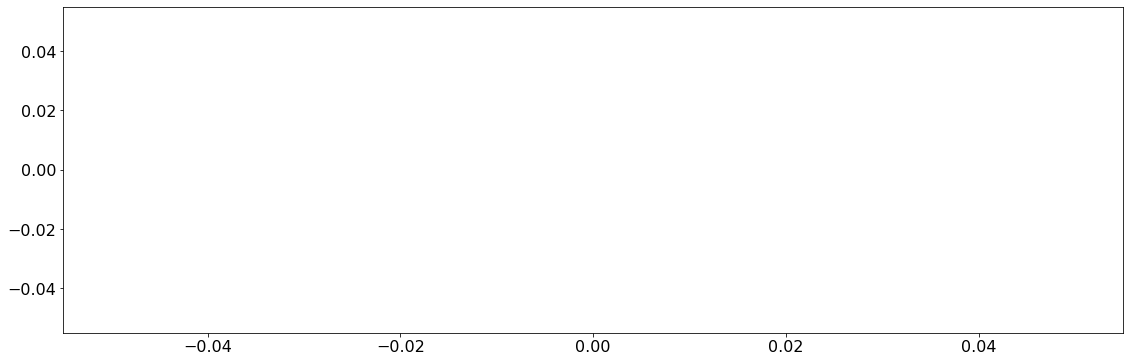

In [ ]:
# Проверим пропуски
pass_value_barh(data)

## Меняем тип данных

In [ ]:
# изменим тип данных оценок
data['user_score'] = data['user_score'].astype(float)
data['critic_score'] = data['critic_score'].astype(int)
data['year_of_release'] = data['year_of_release'].astype(int)

In [ ]:
# Проверим данные
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


## Добавим столбел Total_sales

In [ ]:
data['total_sales'] = data['na_sales']+ data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [ ]:
# Проверим
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,1984,1984.0,Нет рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52


## Причина пропусков

Пропуски в оценках критиков и пользователей образовались из-за отсутсвия данных на момент выгрузки их из системы.

Пропуски в Рейтинге были из-за разной системы оценивая возразраста в разныз странах. Так, на момент анализа, без рейтинга приобладал Японии, т.к. там другая рейтинговая система.

Пропуски в годах образовалист из-за ошибки выгрузки.

# Исследование платформ

## Сколько игр выпускалось в год

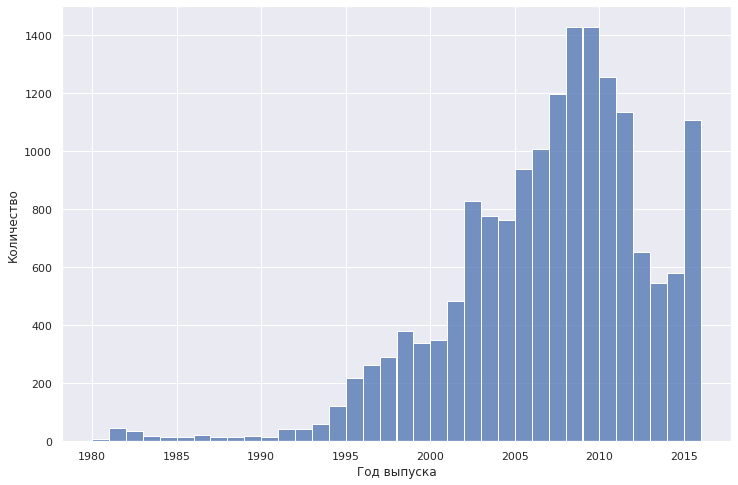

In [ ]:
sns.set_theme(style="ticks", )
sns.set()


# Посмотрим на распределение данных
plt.figure(figsize=(12, 8))
sns.histplot(data['year_of_release'], bins=(36));
plt.xlabel('Год выпуска');
plt.ylabel('Количество');

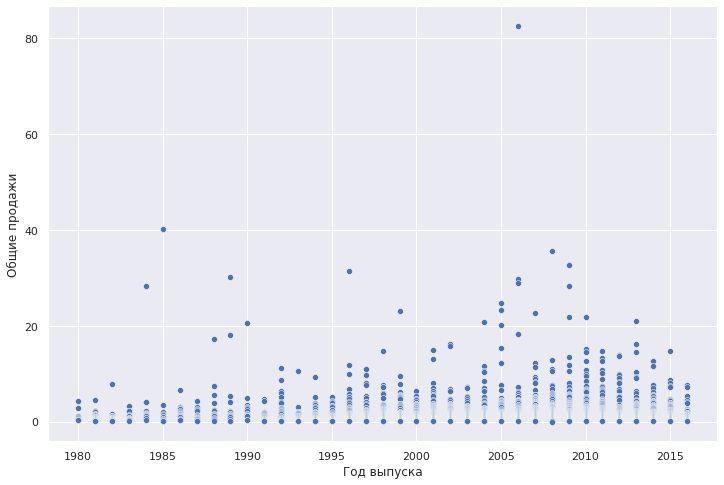

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="year_of_release", y="total_sales", data=data)

plt.xlabel('Год выпуска');
plt.ylabel('Общие продажи');

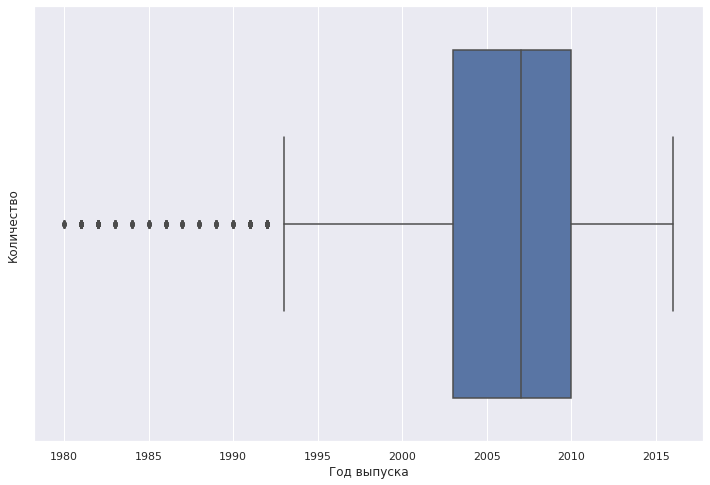

In [ ]:
# Посмотри на выбросы
plt.figure(figsize=(12, 8))
sns.boxplot(x=data['year_of_release']);
plt.xlabel('Год выпуска');
plt.ylabel('Количество');

In [ ]:
print('среднее количество игр в год',16444/36)

среднее количество игр в год 456.77777777777777


### Вывод
    Видим распределение наших данных. Собственно от зарождения игропрома до наших дней(почти настоящего времени).
    В данных наблюдаем рост количества выхода игр начиная с 1990года. До этого же игры были скорее проектами выходного дня для программистов. В 90х началось зарождение индустрии, а так же начали выходить новые платформы для игр.
    График у нас не нормального распределение. С 2005 года по 2012 на рынке образовался своего рода пузырь. В данные года начало выходить очень много игр низкого качетсва, т.к. в данном рынке ещё мало кто разбирался. И к началу 2013 года пузырь лопнул. И колличество выхода игр резко упало.
    начиная с 2015 года рынок начал востанавливаться. Потребители осознали, что производство игр дорогое мероприятие. Но рост все равно слишком резкий. Я связываю это с выходом инди-игр. Они выходили и раньше, но появились новые возможности, а так же переннос старых игр на новые платформы.
    
    По "ящику с усами" можно наблюдать выбросы в начале зарождения индустрии. Считаю, что убирать их из анализа не правильно, т.к. хоть игр и выходило мало, но вышло очень много культовых игр, которые задали эталоны в игровой индустрии.

## Продажи по платформам

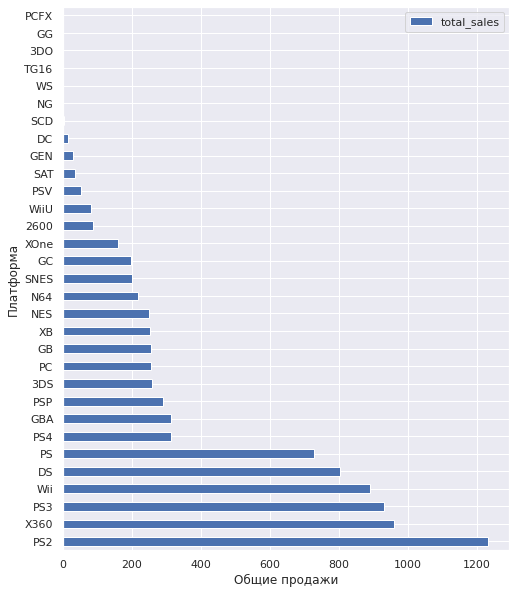

In [ ]:
platform_list = pd.pivot_table(data, index=['platform'],
                               values='total_sales',
                               aggfunc='sum').sort_values(by='total_sales', ascending=False)


platform_list.plot(kind='barh', figsize=(8, 10))
plt.ylabel('Платформа');
plt.xlabel('Общие продажи');


#for index, value in enumerate(platform_list):
#    label = format(int(value), ',')
#    plt.annotate(label, xy=(value-300, index-0.1), color='white')
# Хотел сделать отображение процентов, но не могу понять как это работает. Можешь помочь?

### Вывод:
    Видим 6 выбивающихся платформ по продам. Это связано с поддержкой данных платформ, а так же массовым распространением.

## Срок жизни платформ

In [ ]:
platform_list = pd.pivot_table(data, index=['year_of_release'],
                               columns='platform',
                               values='total_sales',
                               aggfunc='sum')

Посмотрим на общщую картину, чтобы определить какие консоли выбрать для дальнейшего исследования

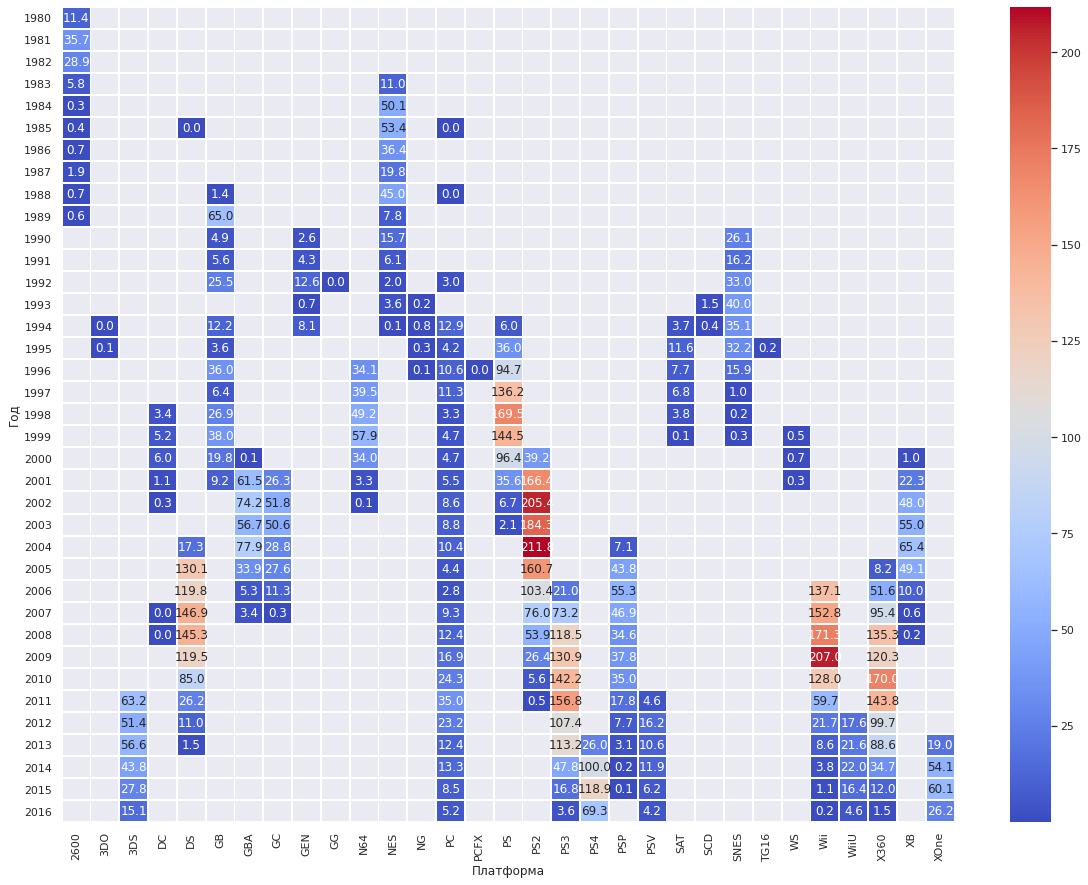

In [ ]:
plt.figure(figsize=(20, 15))

sns.heatmap(data=platform_list,
            annot=True,
            fmt=".1f",
            cmap="coolwarm",
            linewidths=1);

plt.xlabel('Платформа');
plt.ylabel('Год');


Из данных видим много холодных оттенков. Выбрать все актуальные на сегодняшний день платформы не подходит. Многие уже не показывают продажи и идут на спад.

Для анализа выбирем платформы: 3DS, PC, PC-PC4, Wii, WiiU, XB, X360, XOne

Рассмотрим 6 самых доходных платформ.

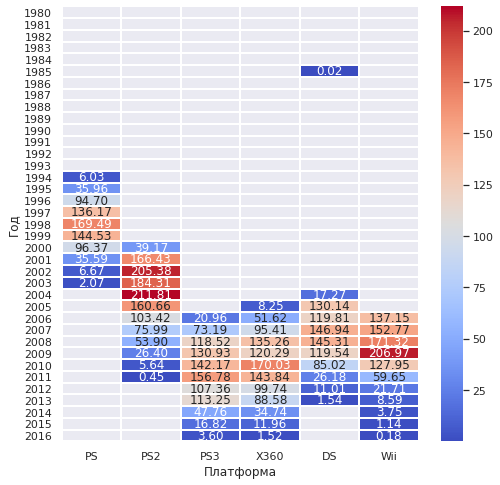

In [ ]:
plt.figure(figsize=(8, 8))

sns.heatmap(data=platform_list[["PS", "PS2","PS3", "X360", "DS", "Wii"]],
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=1);

plt.xlabel('Платформа');
plt.ylabel('Год');


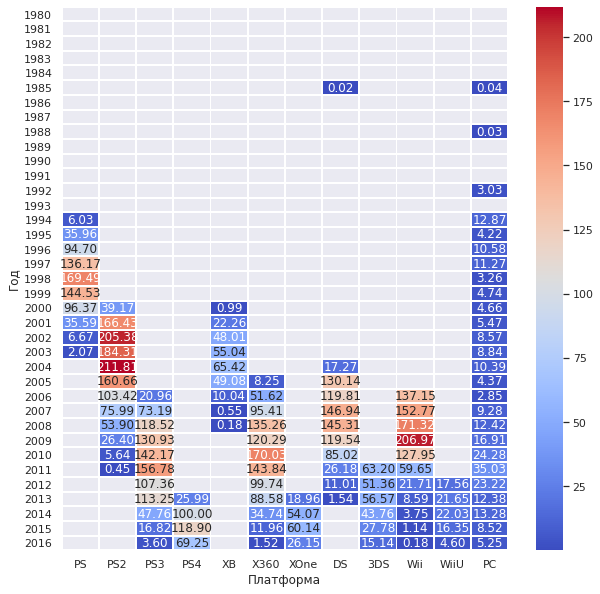

In [ ]:
# Добавим ещё платформ
plt.figure(figsize=(10, 10))

sns.heatmap(data=platform_list[["PS", "PS2","PS3", "PS4", "XB", "X360", "XOne","DS", "3DS", "Wii", "WiiU", "PC" ]],
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=1);

plt.xlabel('Платформа');
plt.ylabel('Год');


### Вывод:


В среднем, платформа существует около 10 лет. Обновление консоли наступает через 5-8 лет. С каждой новой консолью, срок выпуска новой консоли, увеличивается.


У платформы DS есть отклонение в виде продаж игр в 1985. Данная платформа была выпущена в 2004 году, а игра выпущена в 1985 и потом портирована на данную консоль.

В данном исследование мы так же определим актуальный период. Это будет с 2014 года по 2016. Т.к. в 2014 году вышла PS4 и XOne. Обновленние данной платформы будут где-то через 3-4 года.


Самые потенциально прибыльные платформы считаю ХOne, PS4 т.к. это молодые платформы, которые ещё не скоро получат обновление. PC, т.к. это стабильная платформа, которая ни когда не устареет и я думаю, они со временем покажет рост. 3DS, в небольших обьямах, ибо платформа уже относительно старая и в ближайшем времени будет обновление, а так же из-за падающих продажах. Так же, 3DS, Wii, WiiU - это разные платформы одной компании. Я думаю, что в наше время, компании будут стремиться к обьеденению системы.
   

In [ ]:
platform_table = platform_list[['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']]\
    .query('year_of_release >= 2014')

In [ ]:
platform_table

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


## Ящик с усами

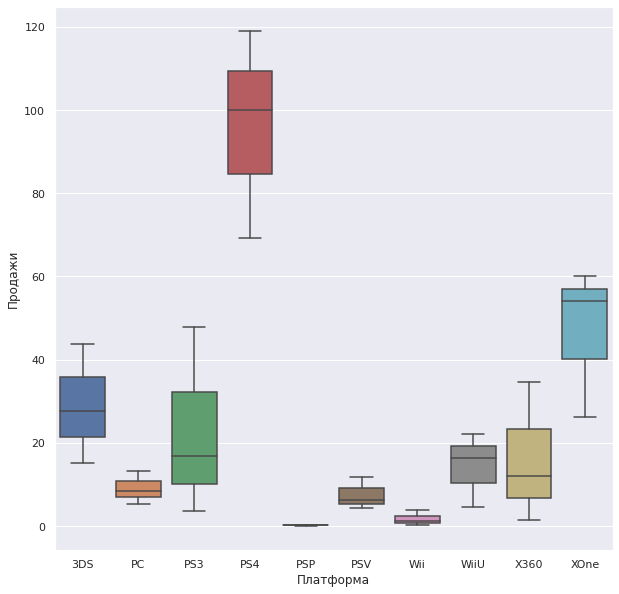

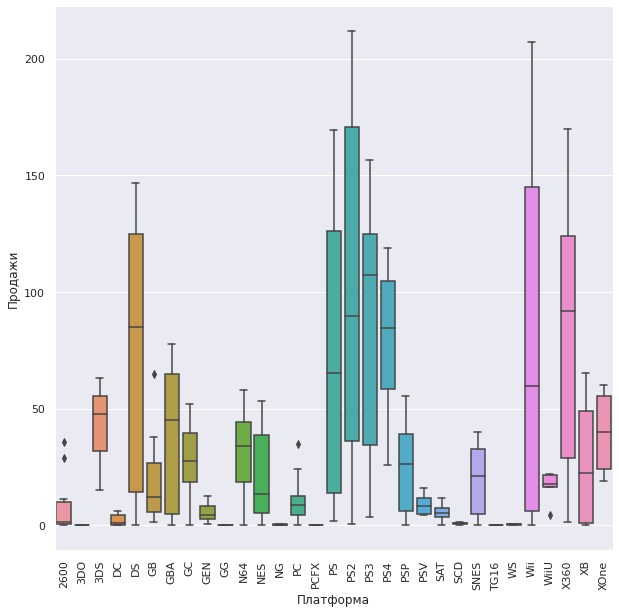

In [ ]:
plt.figure(figsize=(10, 10))

sns.boxplot(data=platform_table);
plt.xlabel('Платформа');
plt.ylabel('Продажи');

plt.show()

plt.figure(figsize=(10, 10))
sns.boxplot(data=platform_list);
plt.xlabel('Платформа');
plt.ylabel('Продажи');

plt.xticks(rotation=90 );

### Добавим ящик по всем данным

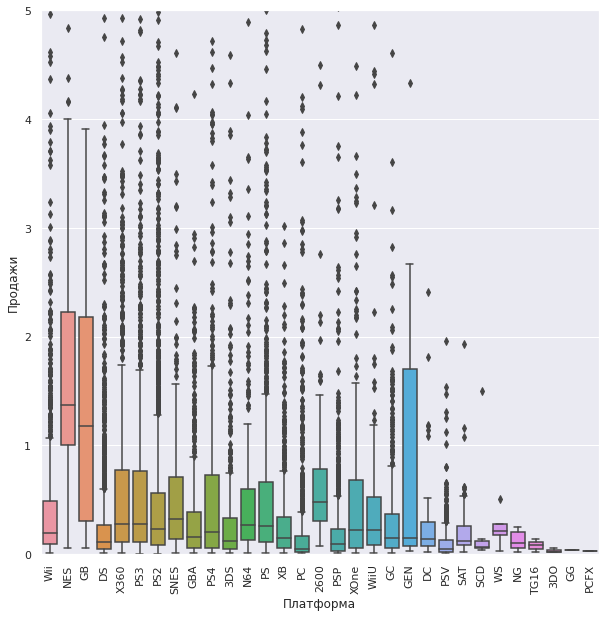

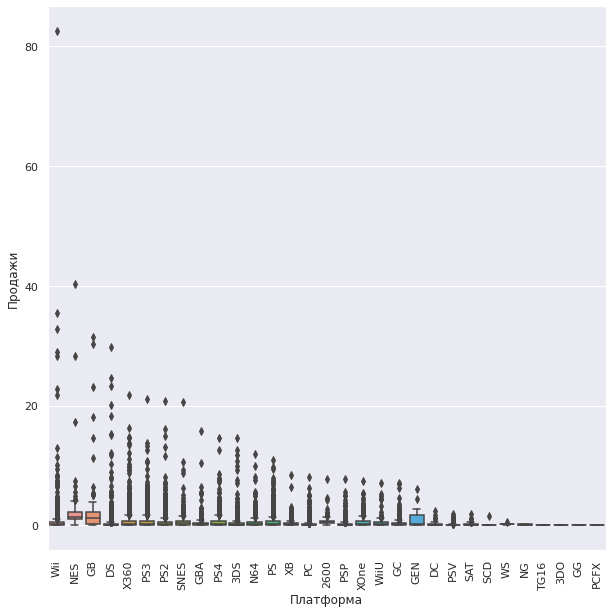

In [ ]:
plt.figure(figsize=(10, 10))

sns.boxplot(data=data, x='platform', y= 'total_sales');
plt.ylim(0, 5)
plt.xlabel('Платформа');
plt.ylabel('Продажи');
plt.xticks(rotation=90 );

plt.show()

plt.figure(figsize=(10, 10))
sns.boxplot(data=data, x='platform', y= 'total_sales');
plt.xlabel('Платформа');
plt.ylabel('Продажи');

plt.xticks(rotation=90 );

### Вывод:

Рассмотрев ящик для потенциальных платформ, видим высокие продажи у PS, после Xbox, 3DS, PC.
Если всматриваться и сравнивать глобально, то PS выглядит самой выгодной из платформ. После неё идет XBOX. Эти две платформы самые прибылье из всех, если мы рассматриваем их как одну, а не делим на серии. А на данный момент PS4 и XBOX One не получили своих продаж.

Мобильные платформы от Nintendo много собираютв общем, но новые консоли не пользуются большой популярностью.


### Вывод дополнение:

Если рассмотреть медиану, то можем сделать вывод, что чем раньше была платформа, тем дешевле была игра. С течение времени, цены на игры поднималась и сейчас, на новых платформах, медианная цена выше, чем на их предшественников. Особенно это заметно на Xbox One and PS4.

## Влияние оценок пользователей и критиков на продажи

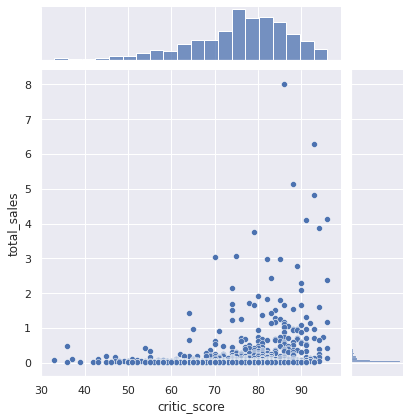

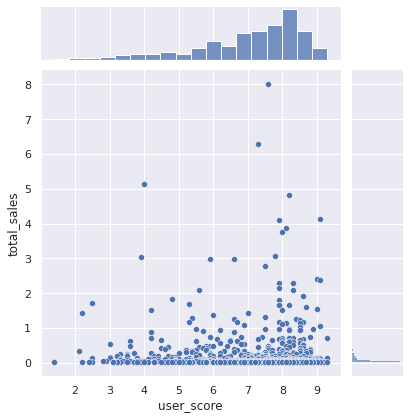

In [ ]:
sns.jointplot(data=data.query('platform =="PC" and critic_score != 1984'), x='critic_score', y='total_sales');
plt.xlabel('Оценка критиков');
plt.ylabel('Общие продажи');
plt.show()

sns.jointplot(data=data.query('platform =="PC" and user_score != 1984'), x='user_score', y='total_sales');
plt.xlabel('Оценка пользователей');
plt.ylabel('Общие продажи');

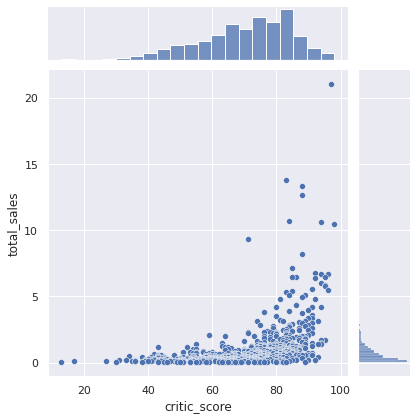

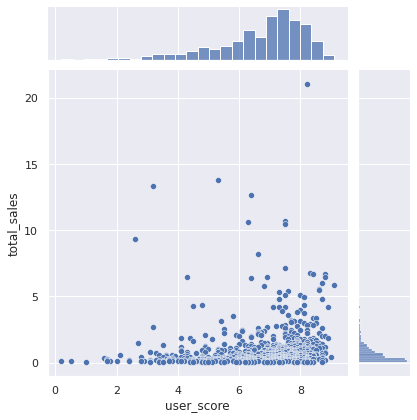

In [ ]:
sns.jointplot(data=data.query('platform =="PS3" and critic_score != 1984'), x='critic_score', y='total_sales');
plt.xlabel('Оценка критиков');
plt.ylabel('Общие продажи');
plt.show()

sns.jointplot(data=data.query('platform =="PS3" and user_score != 1984'), x='user_score', y='total_sales');
plt.xlabel('Оценка пользователей');
plt.ylabel('Общие продажи');

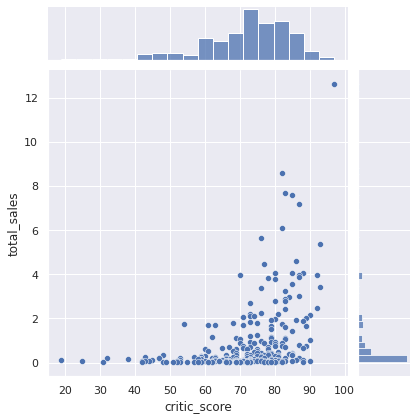

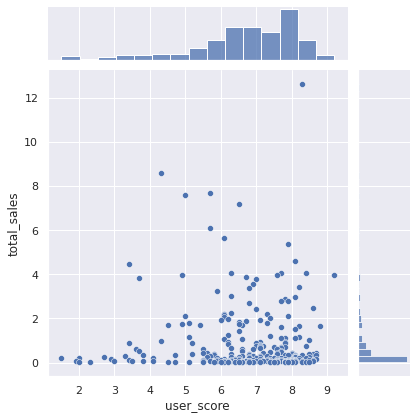

In [ ]:
sns.jointplot(data=data.query('platform =="PS4" and critic_score != 1984'), x='critic_score', y='total_sales');
plt.xlabel('Оценка критиков');
plt.ylabel('Общие продажи');
plt.show()

sns.jointplot(data=data.query('platform =="PS4" and user_score != 1984'), x='user_score', y='total_sales');
plt.xlabel('Оценка пользователей');
plt.ylabel('Общие продажи');

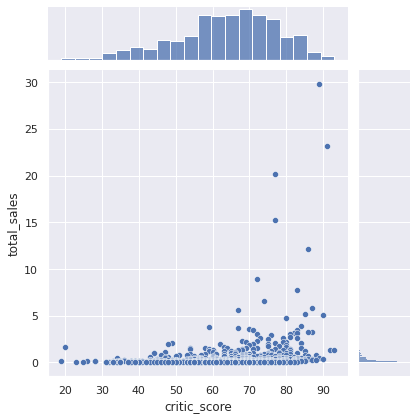

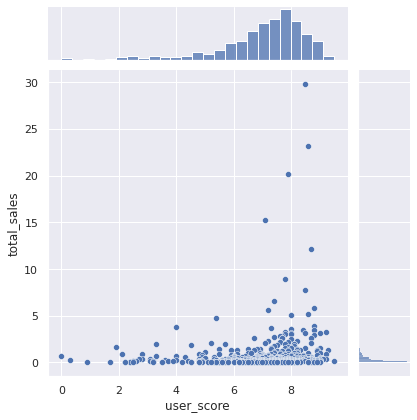

In [ ]:
sns.jointplot(data=data.query('platform =="DS" and critic_score != 1984'), x='critic_score', y='total_sales');
plt.xlabel('Оценка критиков');
plt.ylabel('Общие продажи');
plt.show()

sns.jointplot(data=data.query('platform =="DS" and user_score != 1984'), x='user_score', y='total_sales');
plt.xlabel('Оценка пользователей');
plt.ylabel('Общие продажи');

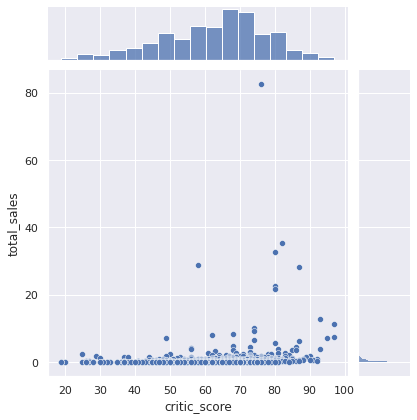

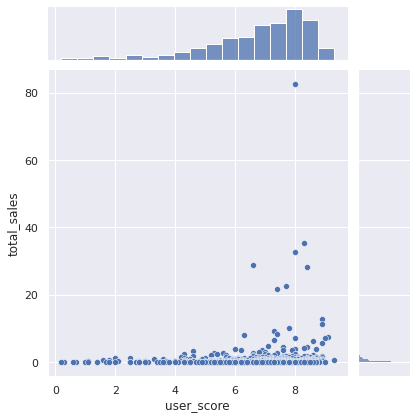

In [ ]:
sns.jointplot(data=data.query('platform =="Wii" and critic_score != 1984'), x='critic_score', y='total_sales');
plt.xlabel('Оценка критиков');
plt.ylabel('Общие продажи');
plt.show()

sns.jointplot(data=data.query('platform =="Wii" and user_score != 1984'), x='user_score', y='total_sales');
plt.xlabel('Оценка пользователей');
plt.ylabel('Общие продажи');

In [ ]:
print('Корреляция между оценкой пользователей',data['total_sales'].corr(data['user_score']))
print('Корреляция между оценкой критиков',data['total_sales'].corr(data['critic_score']))

Корреляция между оценкой пользователей -0.1210687452976952
Корреляция между оценкой критиков -0.0958929012655863


### Вывод:
Критика игр, не особо сильно влияет на продажи. Скорее всего, большее влияние оказывает рекламная компания. Кореляция слабо отрицательная

### Ответы на вопросы
Можешь предположить почему корреляция продаж с отзывами критиков выше, чем с отзывами пользователей?

    Очень легкий ответ. Потому что, на старте продаж пользователи смотрят на ценку критиков, т.к. только они имели доступ к игре. А комьюнити может её оценить только после выхода игры. Вообще, игра в основном, собирает свои продажи в первые несколько месяцев. Это если не рассматриваем ААА проекты или супер огромных рекламных компаний.

Можешь вспомнить, только какой тип связи может выявить корреляция Пирсона?

    Вспомнить не могу, т.к. не понял статистику из спринта вообще, абсолютно ноль. Но могу заглить.
    Характеризует существование линейной связи между двумя величинами. Если связь криволинейная то он не будет работать. Ну похоже у меня в графике как раз прямолинейная связь. Мне очень трудно понять данную тему, т.к. все что я смотрю просто отсутвуют примеры как это выглядит на графиках(почему всегда нужно писать умными словами, чтоб было максимально не понятно. Мне аналитическая химия проще далась).
    
Можно ли утверждать о отсутствии связи при близких к нулю показателях корреляции?

    Не можем. Т.к. если я правильно понял, данные параметры при слабой связи все равно оказывают влияние на данные.

Можешь используя графики выявить нелинейные связи?

    не могу, т.к. не понимаю какой график выбрать.
   

## Распределение по жанрам

In [ ]:
genre_list = pd.pivot_table(data, index=['year_of_release'],
                               columns='genre',
                               values='total_sales',
                               aggfunc='mean')
genre_list.query('year_of_release >= 2014')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,0.517181,0.074267,0.689130,0.556667,0.881000,0.212857,0.617037,0.512584,1.387447,0.507273,0.836111,0.122500
2015,0.284664,0.151111,0.376190,0.296667,0.465385,0.118333,0.448333,0.482564,1.985588,0.377333,0.692203,0.115625
2016,0.169157,0.068214,0.279375,0.081250,0.215333,0.010000,0.116250,0.336667,0.813191,0.105000,0.489375,0.086923


In [ ]:
genre_list = pd.pivot_table(data=data, index='year_of_release', values='total_sales', columns='genre', aggfunc='mean').sort_index(ascending=False)
genre_table = genre_list.head(3)
genre_table

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2016,0.169157,0.068214,0.279375,0.081250,0.215333,0.010000,0.116250,0.336667,0.813191,0.105000,0.489375,0.086923
2015,0.284664,0.151111,0.376190,0.296667,0.465385,0.118333,0.448333,0.482564,1.985588,0.377333,0.692203,0.115625
2014,0.517181,0.074267,0.689130,0.556667,0.881000,0.212857,0.617037,0.512584,1.387447,0.507273,0.836111,0.122500


In [ ]:
bata = data[data['year_of_release'] >= 2014]
bata

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,1984,1984.0,Нет рейтинга,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,1984,1984.0,Нет рейтинга,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,1984,1984.0,Нет рейтинга,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,1984,1984.0,Нет рейтинга,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,1984,1984.0,Нет рейтинга,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,1984,1984.0,Нет рейтинга,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,1984,1984.0,Нет рейтинга,0.01


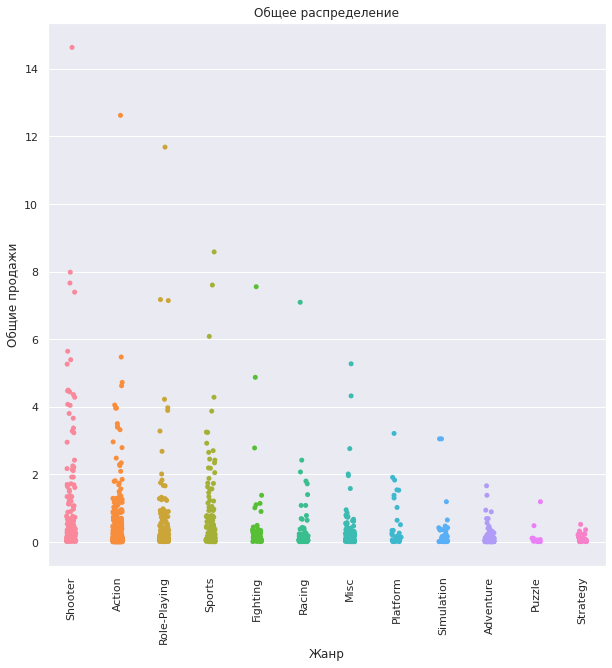

In [ ]:
plt.figure(figsize=(10, 10))

sns.stripplot(x='genre', y='total_sales', data=bata);
plt.xticks(rotation=90 );
plt.xlabel('Жанр');
plt.ylabel('Общие продажи');
plt.title('Общее распределение');

In [ ]:
bata.groupby('genre')['total_sales'].agg(['sum', 'count', 'mean']).sort_values('sum', ascending=False)

,sum,count,mean
genre,,,
Action,199.36,619,0.322068
Shooter,170.94,128,1.335469
Sports,109.48,161,0.680000
Role-Playing,101.44,221,0.459005
Misc,37.55,113,0.332301
Fighting,28.22,60,0.470333
Racing,27.52,69,0.398841
Platform,18.09,38,0.476053
Adventure,17.55,185,0.094865


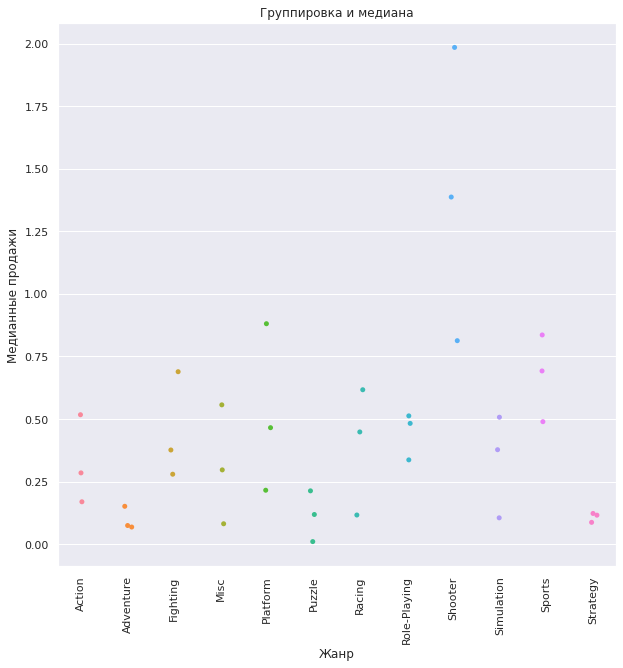

In [ ]:
plt.figure(figsize=(10, 10))

sns.stripplot(data=genre_list.query('year_of_release >= 2014'));
plt.xticks(rotation=90 );
plt.xlabel('Жанр');
plt.ylabel('Медианные продажи');
plt.title('Группировка и медиана');

### Вывод:
Чтож, самым выгодным жанром можно считать экшен, спорт и шутер. Думаю связано с тем, что подобные жанры сильно затягиваю.

### Вывод 2.0

Рассмотрев график за актуальный период, можно сделать вывод, что Шутер является самым прибыльным жанром. Самым большим по численности жанрром является Экшен. А жанры спорт и ролевые игры прибыльнее экшена в 3 раза.

# Портреты пользователей

## Самые популярные платформы

In [ ]:
def pie_plot(data, labels):
    plt.figure(figsize=(10, 10))
    plt.pie(data, labels = labels, autopct='%.1f%%')
plt.show()

### Топ 5 популярных платформ в мире

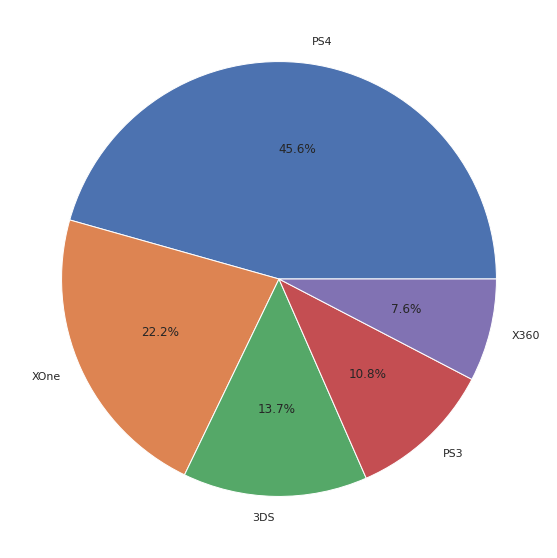

In [ ]:
# Полярные платформы по миру.
portret = (pd.pivot_table(data=bata, index='platform',
                         values=['na_sales','eu_sales', 'jp_sales', 'other_sales', 'total_sales'],
                         aggfunc=('sum'))
           .reset_index()
           .sort_values(by='total_sales',
                        ascending=False)
           .head()
           )
pie_plot(portret['total_sales'], portret['platform'])

#### Вывод:
Самой популярной платформой является PS и XBOx и платформа Nintendo.


###  Топ 5 популярных платформ в Америке

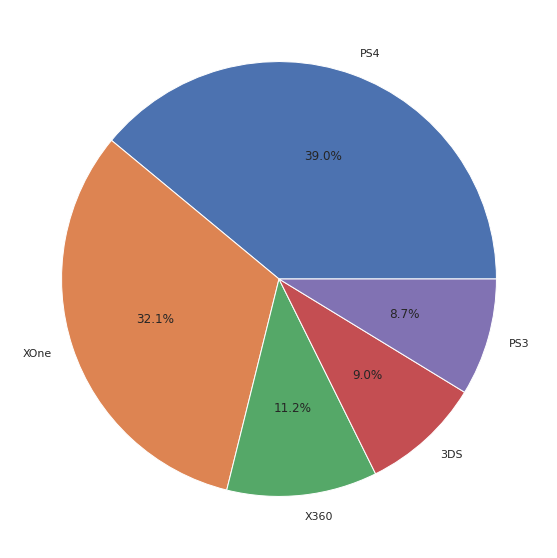

In [ ]:
# Популярные платформы в Америке.
portret = (pd.pivot_table(data=bata, index='platform',
                         values=['na_sales','eu_sales', 'jp_sales', 'other_sales', 'total_sales'],
                         aggfunc=('sum'))
           .reset_index()
           .sort_values(by='na_sales',
                        ascending=False)
           .head()
           )
pie_plot(portret['na_sales'], portret['platform'])

#### Вывод:
В Америке так же самыми поплярными платформами является XBOX и PS. Небольшую часть рынка занимает 3DS

### Топ 5 популярных платформ в Европе

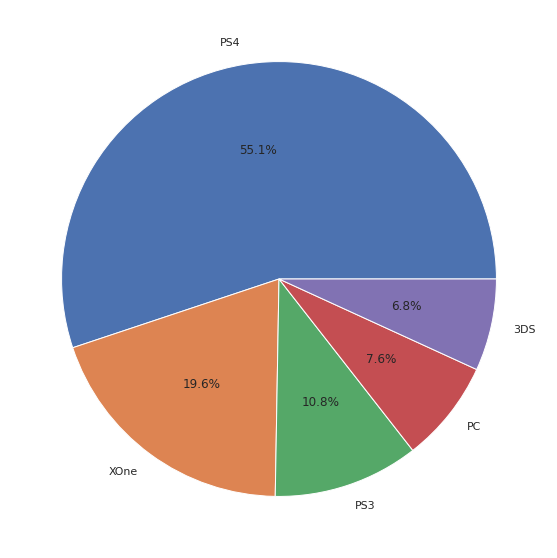

In [ ]:
# Популярные платформы в Европе
portret = (pd.pivot_table(data=bata, index='platform',
                         values=['na_sales','eu_sales', 'jp_sales', 'other_sales', 'total_sales'],
                         aggfunc=('sum'))
           .reset_index()
           .sort_values(by='eu_sales',
                        ascending=False)
           .head()
           )
pie_plot(portret['eu_sales'], portret['platform'])

#### Вывод:
В Европе лидирует PS. Вторым идет XBOX. Sony занимает почти весь рынок в Европе! Вау.
3DS занимает незначительную нишу.

### Топ 5 популярных платформ в Японии

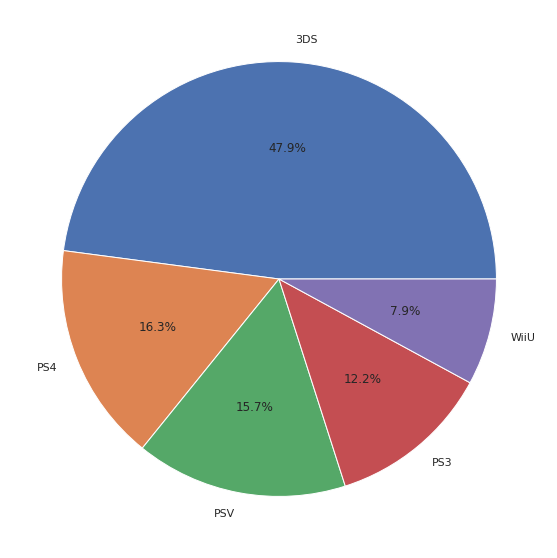

In [ ]:
# Популярные платформы в Японии
portret = (pd.pivot_table(data=bata, index='platform',
                         values=['na_sales','eu_sales', 'jp_sales', 'other_sales', 'total_sales'],
                         aggfunc=('sum'))
           .reset_index()
           .sort_values(by='jp_sales',
                        ascending=False)
           .head()
           )

pie_plot(portret['jp_sales'], portret['platform'])

#### Вывод:
В Японии, лидирует Nintendo. Вторым местом идет PS. XBOX не используется. И даже используется мобильная платформа от sony

### Общий вывод:
 В целом, по миру лидирует японские платформы. Домашние платформы PS и мобильные платформы Nintendo.
 xbox не сильно составляет им конкуркцию. Думаю, это связано с политикой PS, Nintendo. Данные компание берут клиентов в первую очередь из-за экслюзивных и качественных проектов на свои консоли. А у Xbox подобное направление плохо развито.

#### Общий вывод 2.0

Sony занимает большую часть рынка домашних консолей. Платформы Nintendo в основном используются в Японии. Небольшую часть рынка они занимают в Европе. Xbox пользуется популярностью в Европе и Америке. А Японии, данная платформа вообще не попала в список топ 5.

## Самые популярные жанры

In [ ]:
def pie_plot_genre(jjj, kkk):
    genre_top5 = (pd.pivot_table(data=bata, index='genre',
                         values=['na_sales','eu_sales', 'jp_sales', 'other_sales', 'total_sales'],
                         aggfunc=('sum'))
           .reset_index()
           .sort_values(by=jjj,
                        ascending=False)
           .head()
           )
    plt.figure(figsize=(10, 10))
    plt.pie(genre_top5[jjj], labels = genre_top5[kkk], autopct='%.1f%%')
    plt.show()

### Топ 5 жанров по миру

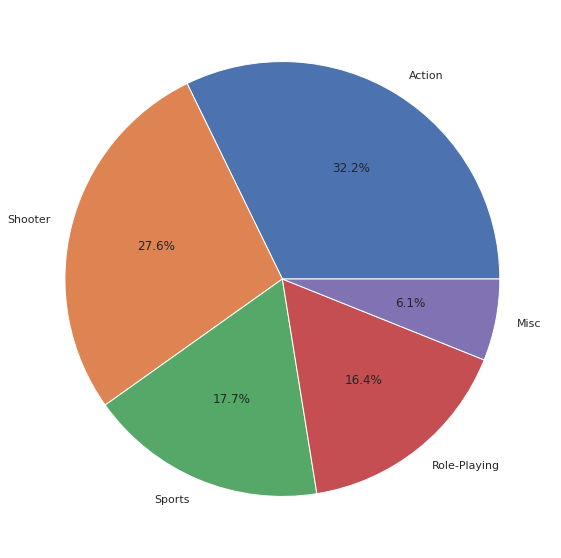

In [ ]:
pie_plot_genre('total_sales', 'genre')

#### Вывод:
По миру в целом, популярны жанры, которые сильно затягивают в геймплей. Данные жанры очень активные и от них(по собственному опыту) очень сложно оторваться, т.к. очень сильно затягивают тебя в игру.


### Топ 5 жанров в Америке

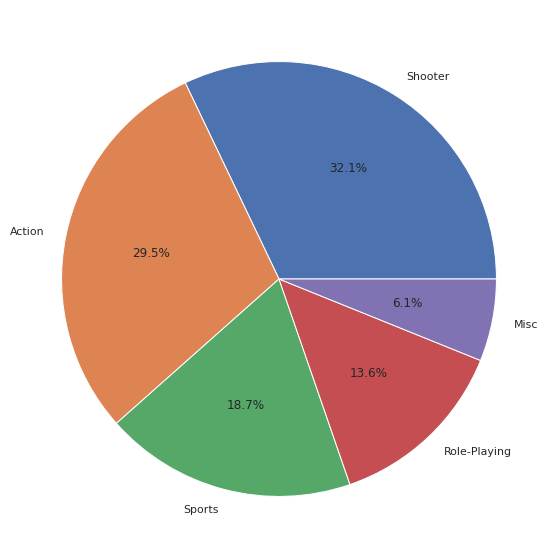

In [ ]:
pie_plot_genre('na_sales', 'genre')

#### Вывод:
В целом, та же картина, что и по миру. Думаю это связано с тем, что множетсво данных идет именно с Америки.

### Топ 5 жанров в Европе

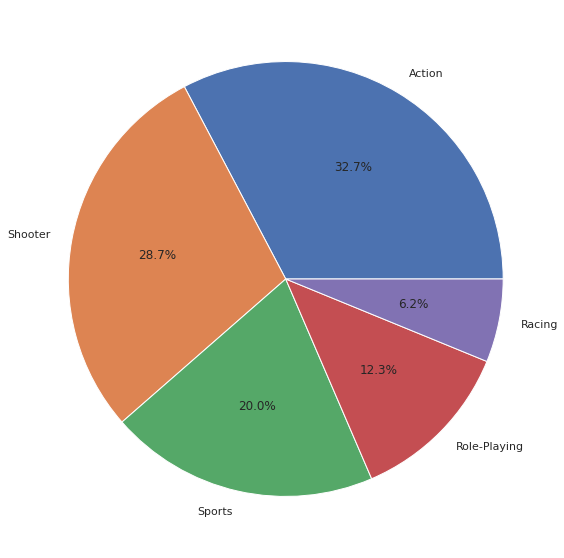

In [ ]:
pie_plot_genre('eu_sales', 'genre')

#### Вывод:
А в Европе любят погонять на машинках, в место плтформеров.

#### Вывод 2.0
В целом, рынки Америки и Европы схожи в выборе жанров.

### Топ 5 жанров в Японии

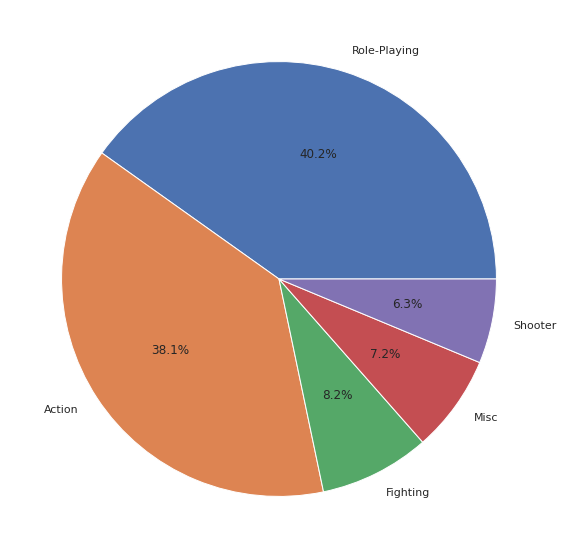

In [ ]:
pie_plot_genre('jp_sales', 'genre')

#### Вывод:
А вот Япония в целом, любит тоже, что и во всем мире, но ролевые игры любит особенно. Довольно сильный перекос в данном жанре.
В топ 5 не попал шутер, за место него платформеры.


#### Вывод 2.0
В Японии очень популярны ролевые игры и экшен(привет манге). Очень сильные перекосы в данных жанрах. И не большую часть занимают файтинги, миск и шутеры.

### Общий вывод:
 Общим вывод. 7 популярных жанров. Action, Sports, Shooter, Role-Playing, Platform, Misc, Racing каждый из которых занимает внушительную долю на рынке, особенно отталкиваясь от определенной страны. Америка и Европа похожи в выборе, однако Япония сильно отличается в выборе жанра игр.


### Общий вывод 2.0
Так же хочу отметить, что у игр как нет какого-то одного жанра. При определение жанра используется преобладающая часть геймплея.

## Влияние рейтинга ESRB на продажи в разных регионах


### Влияние рейтинга на продажи по Миру

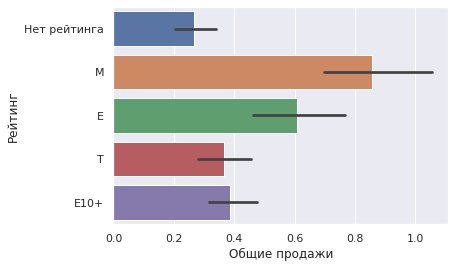

In [ ]:
sns.barplot(x=bata["total_sales"], y=bata["rating"]);
plt.xlabel('Общие продажи');
plt.ylabel('Рейтинг');

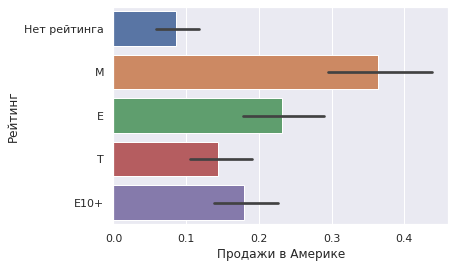

In [ ]:
sns.barplot(x=bata["na_sales"], y=bata["rating"]);
plt.xlabel('Продажи в Америке');
plt.ylabel('Рейтинг');

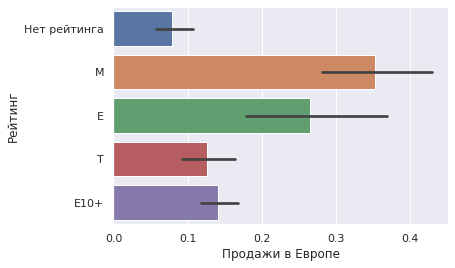

In [ ]:
sns.barplot(x=bata["eu_sales"], y=bata["rating"]);
plt.xlabel('Продажи в Европе');
plt.ylabel('Рейтинг');

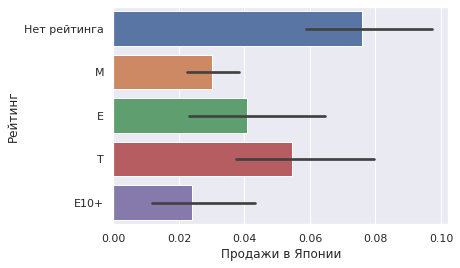

In [ ]:
sns.barplot(x=bata["jp_sales"], y=bata["rating"]);
plt.xlabel('Продажи в Японии');
plt.ylabel('Рейтинг');

### Общий вывод:
 В целом, рейтинг влияет на продажи, т.к. мы игру трудно пустить в массовые продажи без рейтинга.
 Однако, мы видим, что в Японии игры продаются в основном без рейтинга. Это связано с тем, что в Японии своя рейтинговая система, которая оценивает игры.

## Проверка гипотез

Наши гипотезы:

    Гипотеза 1.
    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    
    H0:Пользовательский рейтинг(user_score) платформы Xbox One = пользовательскому рейтингу платформы PC;
  
    H1:Пользовательский рейтинг(user_score) платформы Xbox One ≠ пользовательскому рейтингу платформы PC
  
    Гипотеза 2.
    Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    H0:Пользовательский рейтинг(user_score) жанрав Action = Пользовательский рейтинг(user_score) Sports.
    
    H1:Пользовательский рейтинг(user_score) жанрав Action ≠ Пользовательский рейтинг(user_score) Sports.

### Гипотеза 1

In [ ]:
bata = bata.query('user_score != 1984')

results = st.ttest_ind(
    bata[bata['platform'] =='XOne']['user_score'],
    bata[bata['platform'] =='PC']['user_score'],
    equal_var=False)
alpha = .05


print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


#### Вывод:
Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - верна. И это можно пояснить тем, что на Хbox выходит не так много экслюзивов, которые не портируются на PC, по этому оценки пользователей и критиков будут к одной игре, только на разных платформах.

### Гипотеза 2

In [ ]:
results = st.ttest_ind(
    bata[bata['genre'] =='Action']['user_score'],
    bata[bata['genre'] =='Sports']['user_score'],
    equal_var=False)
alpha = .05


print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


#### Вывод:
Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковы - неверна. Думаю это связано с тем, что жанры кардинально разные. Если в прошлой гипотезе мы сравнивали платформы, игры на которые портируются, то тут мы сравним два кардинально разных жанра, у которых из общего, только действие.

##### Выбор альфы и формулировка гипотез.

Альфу выбрал произвольно, т.к. данный параметр выбирается произвольно.

Для проверки гипозизы использовался t-критерий Стьюдента (связанные выборки)

# Общий вывод

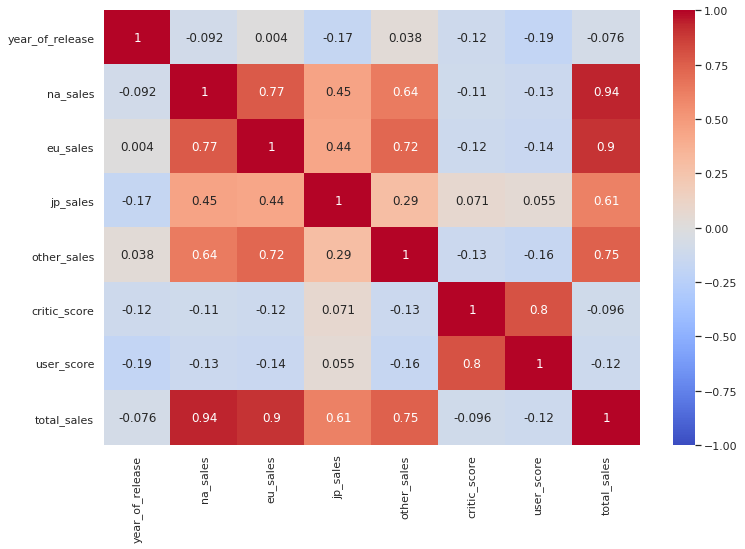

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=data
            .corr(),
            annot=True,
            fmt='.2g',
            vmin=-1,
            vmax=1,
            center= 0,
            cmap= 'coolwarm');

Посмотрим на всю картину в целом. Как тот или иной параметр влияет на продажи.

Ответим на основные вопросы.
    
    Сколько игр выходило в год?
    
        ~ 450 игр выходит в год.
    
    Важны ли эти данные?
    
        - Считаю данные не важны. Корреляция прослеживается слабо отрицательная.
    
    Как менялись продажи по платформам?
        - На начале игровой индустрии было множество разных платформ, каждая была со своими фишками и системами. С годами консолии эволюционировали и пришли к определенным типам. На рыноке появилась SONY и Microsoft со своими консолями. Данные компании сделали выбор в пользу одной платформы с её улучшениями в течение лет. Данный подход понравился и разработчикам, т.к. разработка идет под определенные консоли и вам не нужно распыляться на сотни устройств. И таким образом на рынке лидируют два конкурента. Это PS, XBOX а так же, стоит особняком Nintendo и PC. Нинтендо, скоро придется обновлять свои множество платформ и я думаю, они придут к одной единой платформе. А персональные компьютеры просто никогда не устареют.
    
    Какие платформы лидируют по продажам?
        - Как я описал выше, лидирующие платформы - это PC, XBOX, PS и консоли от Nintendo.
    Как влияют отзывы критиков и геймеров на продажи?
        - Нет. Основываясь на корреляции(слабо отрицательной), влияние они не оказывают.
    Какое распределение игр по жанрам?
        - У нас есть 3 ярко выделяющихся жанра. Это - Экшен, шутеры и спорт. Данные жанры покупают в большестве стран Америки и Европпы. В Японии картина отличается, рынок немного другой. Выделяется за место шутера, преобладает платформер. А самый большой жанр - это роле игры.
        
Итак, основываясь на наших данных, я могу порекомендовать вкладывать в PS4, Xbox One и PC. 2 платформы только набирают поплярность, пик который приходиться на 5-6 год существования платформ. Персональные компьютеры являются стабильной платформой, которая хоть и не всегда собирает большие продажи, но является стабильной платформой, которая не зависит от времени. Платформы Nintendo не стоит делать упор на закупку данных игр, данные платформы уже не мало поплярны и нужно ждать новых релизов от компании.

## Вывод 2.0
 - Данные:
Наши данные взяты с портала Mecritic до 2016 года. Пропуски в данных образовались из-за выгрузки данных. На момент выгрузки не было оценок, рейтингов к некоторым играм. Пропуски в рейтингах образовались из-за разной системы оценки возрастов в некоторых странах. Так, одна из основных иследуемых стран была Японимая. В Японии используется другая система оценки рейтинга игр по этой причине, рейтинг отсувтвует на метакритик, т.к. там используется система ESRB.

- работа с данными:

    Я провел работу по замене пропускив заглушками, обьеденил малые категории(старые категории, которые уже не используются) рейтинга. Так же была посчитаны общие продажи по всему миру.

- закономерности
    Мною было замечины:
    
    Оценки пользователей почти не влияют на продажи, нежеле оценки критиков. Думаю это связано с тем, что на выходе, пользователь руководствуется оценками критиков, т.к. только они имею доступ к играм перед их релизом.
    
    Рынки Америки и Европы, немного схожи. Они не похожи по выбору платформ, но похоже по возрастным и выборам жанров.
    
    Рынок Японии кардинально отличается от рынков Америки и Европы. Да и в целом по миру.
    
    Медиана продаж у жанра Шутер выше, чем у экшена почти в 4 раза. Экшен хоть и является самым большим и прибыльным жанром, его медиана составляет 0.3. И его догоняет не популярные жанры выживания который имеет медиана 0.28.